In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "datainsight-google-analytics-capstone-project"

**LOADING NECESSARY LIBRARIES:**

In [3]:
install.packages("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(tidyverse)
library(lubridate)
library(scales)
library(skimr)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




**LOADING DATA FROM CSV'S:**

In [5]:
jan_23 = read_csv("/kaggle/input/datainsight-google-analytics-capstone-project/202301-divvy-tripdata.csv")
feb_23 = read_csv("/kaggle/input/datainsight-google-analytics-capstone-project/202302-divvy-tripdata.csv")
mar_23 = read_csv("/kaggle/input/datainsight-google-analytics-capstone-project/202303-divvy-tripdata.csv")
apr_23 = read_csv("/kaggle/input/datainsight-google-analytics-capstone-project/202304-divvy-tripdata.csv")
may_23 = read_csv("/kaggle/input/datainsight-google-analytics-capstone-project/202305-divvy-tripdata.csv")
jun_23 = read_csv("/kaggle/input/datainsight-google-analytics-capstone-project/202306-divvy-tripdata.csv")
jul_23 = read_csv("/kaggle/input/datainsight-google-analytics-capstone-project/202307-divvy-tripdata.csv")
aug_23 = read_csv("/kaggle/input/datainsight-google-analytics-capstone-project/202308-divvy-tripdata.csv")
sept_23 = read_csv("/kaggle/input/datainsight-google-analytics-capstone-project/202309-divvy-tripdata.csv")
oct_23 = read_csv("/kaggle/input/datainsight-google-analytics-capstone-project/202310-divvy-tripdata.csv")
nov_23 = read_csv("/kaggle/input/datainsight-google-analytics-capstone-project/202311-divvy-tripdata.csv")
dec_23 = read_csv("/kaggle/input/datainsight-google-analytics-capstone-project/202312-divvy-tripdata.csv")

Rows: 190301 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 190445 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 258678 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

**Efficiently merging and binding form data into a unified dataset for streamlined analysis.**

In [6]:
tripdata_23 <- rbind(jan_23,feb_23,mar_23,apr_23,may_23,jun_23,jul_23,aug_23,sept_23,oct_23,nov_23,dec_23)

In [7]:
head(tripdata_23)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.92407,-87.64628,41.93000,-87.64000,member
13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.00857,-87.69048,42.03974,-87.69941,casual
C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.92607,-87.63886,41.93000,-87.64000,member


**PROCESS PHASE**

**DATA CLEANING** (Checking Null values)

In [8]:
skim_without_charts(tripdata_23)

,skim_type,skim_variable,n_missing,complete_rate,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<dttm>,<dttm>,<dttm>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,POSIXct,started_at,0,1.0000000,2023-01-01 00:01:58,2023-12-31 23:59:38,2023-07-20 18:02:50,4823909,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,POSIXct,ended_at,0,1.0000000,2023-01-01 00:02:41,2024-01-01 23:50:51,2023-07-20 18:19:47,4835702,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,ride_id,0,1.0000000,NA,NA,NA,NA,16,16,0,5719877,0,NA,NA,NA,NA,NA,NA,NA
4,character,rideable_type,0,1.0000000,NA,NA,NA,NA,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA
5,character,start_station_name,875716,0.8468995,NA,NA,NA,NA,3,64,0,1592,0,NA,NA,NA,NA,NA,NA,NA
6,character,start_station_id,875848,0.8468764,NA,NA,NA,NA,3,35,0,1516,0,NA,NA,NA,NA,NA,NA,NA
7,character,end_station_name,929202,0.8375486,NA,NA,NA,NA,3,64,0,1597,0,NA,NA,NA,NA,NA,NA,NA
8,character,end_station_id,929343,0.8375240,NA,NA,NA,NA,3,36,0,1520,0,NA,NA,NA,NA,NA,NA,NA
9,character,member_casual,0,1.0000000,NA,NA,NA,NA,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values     
Name                       tripdata_23
Number of rows             5719877    
Number of columns          13         
_______________________               
Column type frequency:                
  character                7          
  numeric                  4          
  POSIXct                  2          
________________________              
Group variables            None       

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0         1      16  16     0  5719877          0
2 rideable_type              0         1      11  13     0        3          0
3 start_station_name    875716         0.847   3  64     0     1592          0
4 start_station_id      875848         0.847   3  35     0     1516          0
5 end_station_name      929202         0.838   3  64 

The tables **"start_station_name," "start_station_id," "end_station_name,"** and **"end_station_id"** have missing values in a significant portion of their entries, with completeness **rates below 85%**, indicating unreliable or incomplete data that could skew **analysis results**. Dropping these tables can lead to more accurate and focused insights by relying on data with higher **integrity and completeness,** such as **ride IDs, rideable** **types, and member categorization**, which are fully complete and essential for analysis.

In [9]:
tripdata_23 <- drop_na(tripdata_23)


In [10]:
skim_without_charts(tripdata_23)

,skim_type,skim_variable,n_missing,complete_rate,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<dttm>,<dttm>,<dttm>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,POSIXct,started_at,0,1,2023-01-01 00:02:06,2023-12-31 23:58:55,2023-07-20 15:12:22,3790408,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,POSIXct,ended_at,0,1,2023-01-01 00:07:23,2024-01-01 14:20:23,2023-07-20 15:29:43,3801204,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,ride_id,0,1,NA,NA,NA,NA,16,16,0,4331707,0,NA,NA,NA,NA,NA,NA,NA
4,character,rideable_type,0,1,NA,NA,NA,NA,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA
5,character,start_station_name,0,1,NA,NA,NA,NA,3,64,0,1534,0,NA,NA,NA,NA,NA,NA,NA
6,character,start_station_id,0,1,NA,NA,NA,NA,3,35,0,1468,0,NA,NA,NA,NA,NA,NA,NA
7,character,end_station_name,0,1,NA,NA,NA,NA,3,64,0,1557,0,NA,NA,NA,NA,NA,NA,NA
8,character,end_station_id,0,1,NA,NA,NA,NA,3,36,0,1483,0,NA,NA,NA,NA,NA,NA,NA
9,character,member_casual,0,1,NA,NA,NA,NA,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values     
Name                       tripdata_23
Number of rows             4331707    
Number of columns          13         
_______________________               
Column type frequency:                
  character                7          
  numeric                  4          
  POSIXct                  2          
________________________              
Group variables            None       

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate min max empty n_unique whitespace
1 ride_id                    0             1  16  16     0  4331707          0
2 rideable_type              0             1  11  13     0        3          0
3 start_station_name         0             1   3  64     0     1534          0
4 start_station_id           0             1   3  35     0     1468          0
5 end_station_name           0             1   3  64 

**Great news!** Our dataset is now free of **null values**, ensuring a solid foundation for our analysis. 

Next, we'll eliminate **any duplicate rows**, organize the data chronologically by start time, and update column names for clearer understanding and smoother navigation.

In [11]:
colnames(tripdata_23)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [12]:
tripdata_23 <- distinct(tripdata_23)
tripdata_23 <- arrange(tripdata_23,started_at)
tripdata_23 <- rename(tripdata_23, bike_type = rideable_type,
                      start_time = started_at,
                      end_time = ended_at,
                      from_station_name = start_station_name,
                      from_station_id = start_station_id,
                      to_station_name = end_station_name,
                      to_station_id = end_station_id,
                      user_type = member_casual
                      )


In [13]:
head(tripdata_23)

ride_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,user_type
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.89185,-87.62058,41.89085,-87.61862,member
E5AD797A579842F8,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,42.00114,-87.66126,42.00104,-87.66120,casual
8FBD2AD70B0F6A6F,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,41.96889,-87.68400,41.97382,-87.65966,casual
B05BD052B9EBB767,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,41.96154,-87.66619,41.96159,-87.66604,member
F9EA7B9E6C243CFC,classic_bike,2023-01-01 00:04:54,2023-01-01 00:31:52,State St & Randolph St,TA1305000029,Indiana Ave & Roosevelt Rd,SL-005,41.88462,-87.62783,41.86789,-87.62304,member
27C2A67184C49D01,electric_bike,2023-01-01 00:05:43,2023-01-01 00:21:37,Wabash Ave & Grand Ave,TA1307000117,Streeter Dr & Grand Ave,13022,41.89151,-87.62686,41.89228,-87.61204,member


**DISCARDING UNWANTED COLUMNS FROM THE DATASET**

In [14]:
tripdata_23 <- select(tripdata_23,-c(start_lat,start_lng,end_lat,end_lng))
head(tripdata_23)

ride_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,user_type
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>
D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,member
E5AD797A579842F8,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,casual
8FBD2AD70B0F6A6F,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,casual
B05BD052B9EBB767,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,member
F9EA7B9E6C243CFC,classic_bike,2023-01-01 00:04:54,2023-01-01 00:31:52,State St & Randolph St,TA1305000029,Indiana Ave & Roosevelt Rd,SL-005,member
27C2A67184C49D01,electric_bike,2023-01-01 00:05:43,2023-01-01 00:21:37,Wabash Ave & Grand Ave,TA1307000117,Streeter Dr & Grand Ave,13022,member


**PERFOMING DATA CALCULATIONS FOR ANALYSIS**

Lets calculate trip duration by subtracting the start_time from end_time

In [15]:
tripdata_23 <- mutate(tripdata_23,trip_duration = round(difftime(tripdata_23$end_time,tripdata_23$start_time,units = 'mins'),2))

In [16]:
head(tripdata_23)

ride_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,user_type,trip_duration
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<drtn>
D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,member,27.67 mins
E5AD797A579842F8,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,casual,3.95 mins
8FBD2AD70B0F6A6F,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,casual,9.82 mins
B05BD052B9EBB767,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,member,12.42 mins
F9EA7B9E6C243CFC,classic_bike,2023-01-01 00:04:54,2023-01-01 00:31:52,State St & Randolph St,TA1305000029,Indiana Ave & Roosevelt Rd,SL-005,member,26.97 mins
27C2A67184C49D01,electric_bike,2023-01-01 00:05:43,2023-01-01 00:21:37,Wabash Ave & Grand Ave,TA1307000117,Streeter Dr & Grand Ave,13022,member,15.90 mins


**WE NEED TO FIND OUT IF THERE ARE ANY NEGATIVE VALUE FOR TRIP DURATION**

To find out I used MIN Function

In [17]:
min(tripdata_23$trip_duration)

Time difference of -54.57 mins

**DISCARDING NEGATIVE VALUES FROM TRIP_DURATION**

In [18]:
tripdata_23 <- subset(tripdata_23,trip_duration > 0)
min(tripdata_23$trip_duration)

Time difference of 0.02 mins

We've successfully **filtered** our dataset to include only rides with **positive durations**. However, we'll now remove entries **representing maintenance** checks—trips lasting less than a minute where bikes were briefly removed and returned. Additionally, we'll eliminate any **inconsistent** data involving trips under a minute to ensure our analysis is based on genuine user activity.

In [19]:
tripdata_23 <- subset(tripdata_23,!(from_station_name == to_station_name & trip_duration <=1))
tripdata_23 <- subset(tripdata_23,trip_duration >= 1)
min(tripdata_23$trip_duration)

Time difference of 1 mins

**NOW! LET'S CALCULATE THE RUSH HOUR**

The code will first converts the **`start_time`** in the **tripdata_23** dataframe to a numeric format representing hours and minutes (e.g., 14.30 for 2:30 PM) and stores this in a new column named **starting_time**. Then, it categorizes each trip into time-of-day segments ('Morning', 'After Noon', 'Evening', 'Night') based on the `starting_time`, and finally, it removes the `starting_time` column, leaving the dataset with these time-of-day categories as a new feature.

In [20]:
tripdata_23$starting_time <- as.numeric(format(tripdata_23$start_time, "%H.%M"))


tripdata_23 <- tripdata_23 %>% mutate(rush_hour = case_when(starting_time >= 6.0 & starting_time <= 11.59 ~ "Morning",
                                                          starting_time >= 12.0 & starting_time <= 17.59 ~ "After Noon",
                                                          starting_time >= 18.0 & starting_time <= 21.59 ~ "Evening",
                                                          (starting_time >= 22.0 & starting_time <= 23.59) |  
                                                            (starting_time >= 0.0 & starting_time <= 5.59)  ~ "Night"))

tripdata_23 <- select(tripdata_23,-starting_time)

head(tripdata_23)

ride_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,user_type,trip_duration,rush_hour
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<drtn>,<chr>
D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,member,27.67 mins,Night
E5AD797A579842F8,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,casual,3.95 mins,Night
8FBD2AD70B0F6A6F,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,casual,9.82 mins,Night
B05BD052B9EBB767,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,member,12.42 mins,Night
F9EA7B9E6C243CFC,classic_bike,2023-01-01 00:04:54,2023-01-01 00:31:52,State St & Randolph St,TA1305000029,Indiana Ave & Roosevelt Rd,SL-005,member,26.97 mins,Night
27C2A67184C49D01,electric_bike,2023-01-01 00:05:43,2023-01-01 00:21:37,Wabash Ave & Grand Ave,TA1307000117,Streeter Dr & Grand Ave,13022,member,15.90 mins,Night


**Computing and assigning the respective month and weekday for each date entry in the dataset.**

In [21]:
tripdata_23 <- mutate(tripdata_23, month = month(tripdata_23$start_time, label = TRUE))

tripdata_23 <- mutate(tripdata_23, weekday = wday(tripdata_23$start_time, label = TRUE))

head(tripdata_23)

ride_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,user_type,trip_duration,rush_hour,month,weekday
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<drtn>,<chr>,<ord>,<ord>
D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,member,27.67 mins,Night,Jan,Sun
E5AD797A579842F8,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,casual,3.95 mins,Night,Jan,Sun
8FBD2AD70B0F6A6F,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,casual,9.82 mins,Night,Jan,Sun
B05BD052B9EBB767,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,member,12.42 mins,Night,Jan,Sun
F9EA7B9E6C243CFC,classic_bike,2023-01-01 00:04:54,2023-01-01 00:31:52,State St & Randolph St,TA1305000029,Indiana Ave & Roosevelt Rd,SL-005,member,26.97 mins,Night,Jan,Sun
27C2A67184C49D01,electric_bike,2023-01-01 00:05:43,2023-01-01 00:21:37,Wabash Ave & Grand Ave,TA1307000117,Streeter Dr & Grand Ave,13022,member,15.90 mins,Night,Jan,Sun


**ANALYZING**

This analysis phase leverages clean data to reveal insightful monthly trends in ride frequency and duration across different user types, enhancing our understanding of user behavior.

The provided code segment groups the cleaned dataset tripdata_23 by month and user_type, then calculates the total number of rides, total ride time, and average ride time for each group, resulting in a new dataframe user_type_monthly_data that offers a detailed monthly analysis of ride patterns by user type.

In [22]:
user_type_monthly_data <- tripdata_23 %>%
  group_by(month, user_type) %>%
  summarise(number_of_rides = n(),
            total_ride_time = sum(trip_duration),
            average_ride_time = mean(trip_duration),
            .groups = 'drop') # This will drop all grouping in the result

user_type_monthly_data

month,user_type,number_of_rides,total_ride_time,average_ride_time
<ord>,<chr>,<int>,<drtn>,<drtn>
Jan,casual,29015,440475.0 mins,15.18094 mins
Jan,member,115432,1185872.9 mins,10.27335 mins
Feb,casual,32138,578954.0 mins,18.01462 mins
Feb,member,113698,1215918.0 mins,10.69428 mins
Mar,casual,45730,781889.6 mins,17.09796 mins
Mar,member,148788,1560948.2 mins,10.49109 mins
Apr,casual,108147,2499433.3 mins,23.11144 mins
Apr,member,206723,2466348.5 mins,11.93069 mins
May,casual,173651,4340339.4 mins,24.99461 mins


**Similarly lets check info based on Weekdays**

In [23]:
user_type_weekday_data <- tripdata_23 %>% 
  group_by(weekday, user_type) %>% 
  summarise(number_of_rides = n(),
            total_ride_time = sum(trip_duration),
            average_ride_time = mean(trip_duration),
            .groups = 'drop')
user_type_weekday_data


weekday,user_type,number_of_rides,total_ride_time,average_ride_time
<ord>,<chr>,<int>,<drtn>,<drtn>
Sun,casual,250162,6765218 mins,27.04335 mins
Sun,member,300966,4187944 mins,13.91501 mins
Mon,casual,172327,3951163 mins,22.92829 mins
Mon,member,378349,4462817 mins,11.79550 mins
Tue,casual,178383,3722256 mins,20.86665 mins
Tue,member,439392,5224381 mins,11.89002 mins
Wed,casual,179926,3586898 mins,19.93541 mins
Wed,member,443255,5241370 mins,11.82473 mins
Thu,casual,195532,3976586 mins,20.33726 mins


**CALCULATING RUSH HOURS AND USERTYPE**

In [24]:
rush_hours_usertype <- tripdata_23 %>%  
   group_by(rush_hour, user_type) %>% 
   summarise(number_of_rides = n(),.groups = 'drop')
  

rush_hours_usertype

rush_hour,user_type,number_of_rides
<chr>,<chr>,<int>
After Noon,casual,709063
After Noon,member,1180791
Evening,casual,334297
Evening,member,583826
Morning,casual,314410
Morning,member,795977
Night,casual,147256
Night,member,177934


Having meticulously computed all essential data, we now advance to the subsequent phase of our analysis.

**Share Phase**

Initially, we will undertake a comparative analysis of casual rides versus member rides on a monthly basis, aiming to discern underlying patterns and trends.

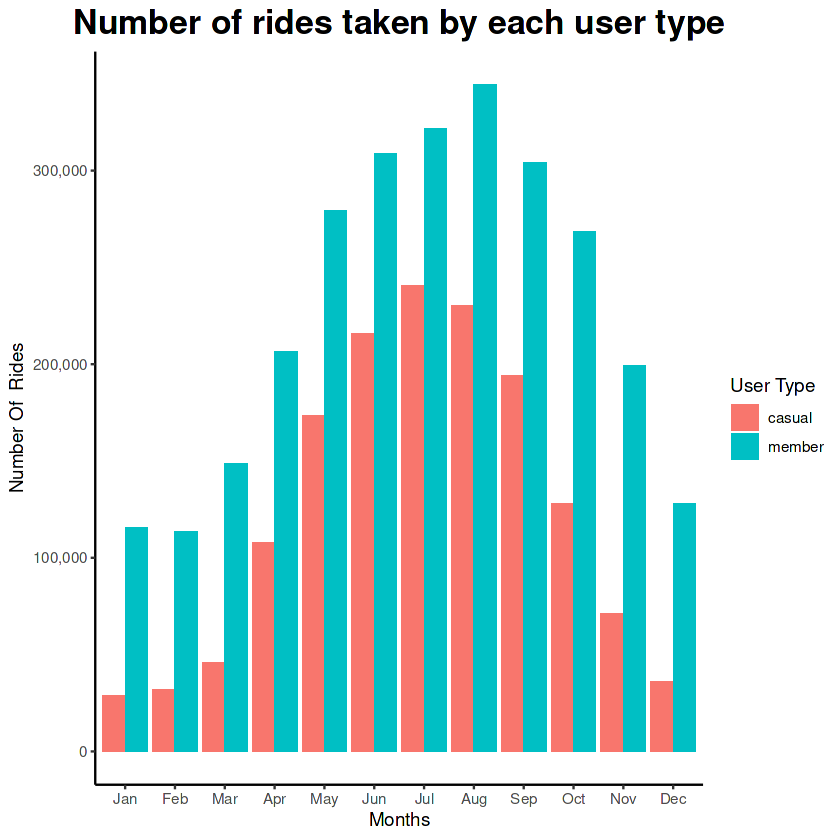

In [25]:
user_type_monthly_data %>% ggplot(mapping = aes(x=month, y= number_of_rides, fill = user_type)) + 
  geom_col(position="dodge", width = 0.9) +
  scale_x_discrete(limits = month.abb) +
  scale_y_continuous(labels = comma) +
  ggtitle("Number of rides taken by each user type") +
  xlab("Months") +
  ylab("Number Of  Rides") +
  labs(fill = "User Type")+
  theme_classic()+
  theme(plot.title = element_text(hjust = 0.5, size=20, face = "bold"))

**Key Takeaways:**

Our analysis reveals a **seasonal trend** in biking activity, with ride numbers swelling during the warmer months and diminishing as temperatures drop. Interestingly, members consistently outpace **casual riders** in the number of rides taken throughout the year, with the notable exception of the summer months **(June, July, August)**, where this trend is reversed. 

**Moving forward**, we will delve into the monthly total ride time and average ride time to further understand these dynamics.

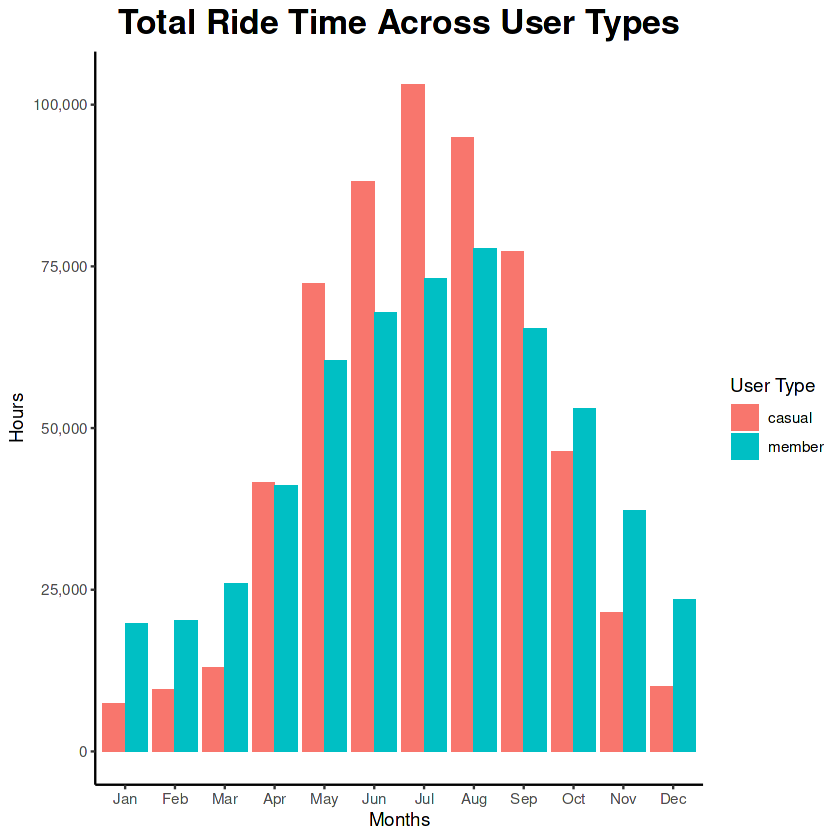

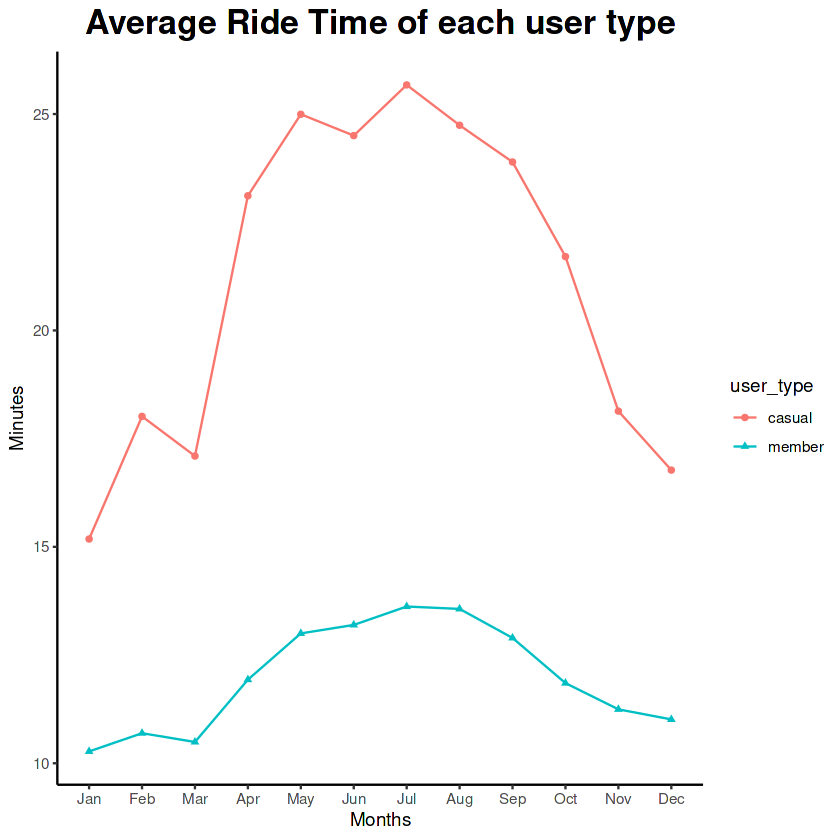

In [26]:
user_type_monthly_data %>% ggplot(mapping = aes(x=month, y= total_ride_time/60, fill = user_type)) + 
  geom_col(position="dodge") +
  scale_x_discrete(limits = month.abb) +
  scale_y_continuous(labels = comma) +
  ggtitle("Total Ride Time Across User Types") +
  xlab("Months") +
  ylab("Hours") +
  labs(fill = "User Type")+
  theme_classic()+
  theme(plot.title = element_text(hjust = 0.5, size=20, face = "bold"))

user_type_monthly_data %>% ggplot(mapping = aes(x=month, y= average_ride_time, group = user_type, color =user_type)) + 
  geom_line() + geom_point(aes(shape = user_type)) +
  scale_x_discrete(limits = month.abb) +
  scale_y_continuous(labels = comma) +
  ggtitle("Average Ride Time of each user type") +
  xlab("Months") +
  ylab("Minutes") +
  labs(fill = "User Type")+
  theme_classic()+
  theme(plot.title = element_text(hjust = 0.5, size=20, face = "bold"))

The first code generates a **bar chart** visualizing the total ride time (converted to hours) for each user type across different **months**, employing a distinct color fill for each user type and positioning the bars side-by-side for easy comparison. 

The second code creates a **line chart** with points, depicting the average ride time for each user type per month, using different colors and shapes to distinguish between user types.

Together, these **visualizations** provide insightful contrasts between total and average ride times of different user types over the year, presented in an accessible and visually appealing manner.

**Key Insights:**

Casual riders consistently surpass members in total ride time across all months, with the exception of the winter period. Despite members undertaking a greater number of rides annually outside of the **summer season**, casual riders exhibit longer average ride durations throughout the year. 

**Next**, we will examine riding patterns based on weekdays to further understand these user behaviors.

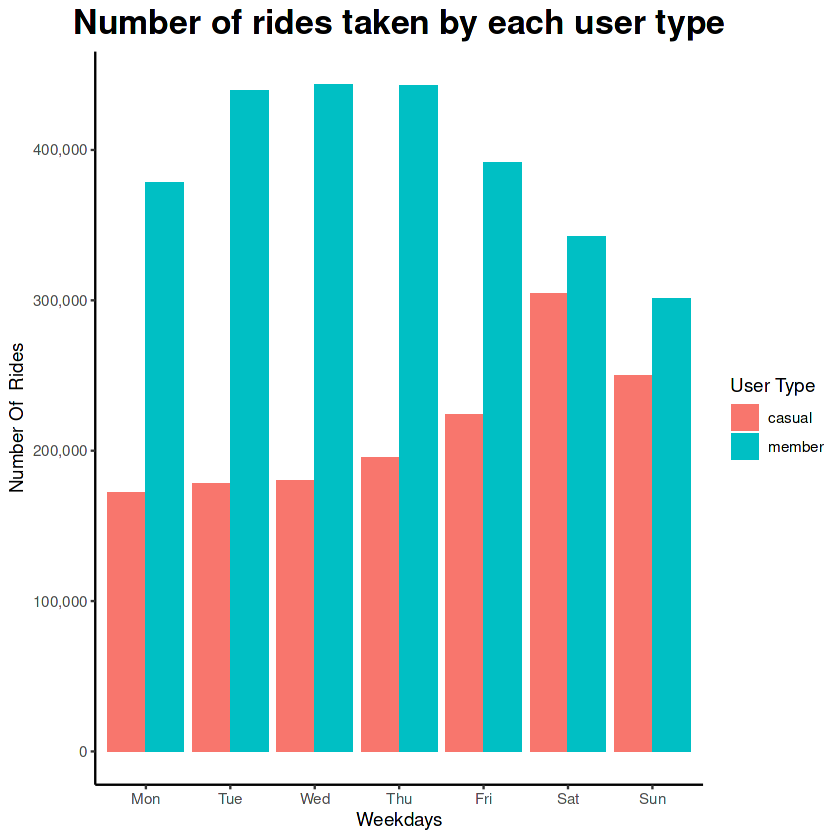

In [27]:
user_type_weekday_data %>% ggplot(mapping = aes(x=weekday, y= number_of_rides, fill = user_type)) + 
  geom_col(position="dodge") +
  scale_x_discrete(limits = c("Mon","Tue","Wed","Thu","Fri","Sat","Sun")) +
  scale_y_continuous(labels = comma) +
  ggtitle("Number of rides taken by each user type") +
  xlab("Weekdays") +
  ylab("Number Of  Rides") +
  labs(fill = "User Type")+
  theme_classic()+
  theme(plot.title = element_text(hjust = 0.5, size=20, face = "bold"))

**Key Insights:**

- Members display consistent riding habits across all weekdays, indicating a steady utilization of the bike-share system.

- Casual riders, in contrast, show a marked preference for weekend rides, suggesting recreational or non-committal use of the service.

**Next**, we will delve into riding patterns during rush hours to gain deeper insights into user behavior during peak travel times.

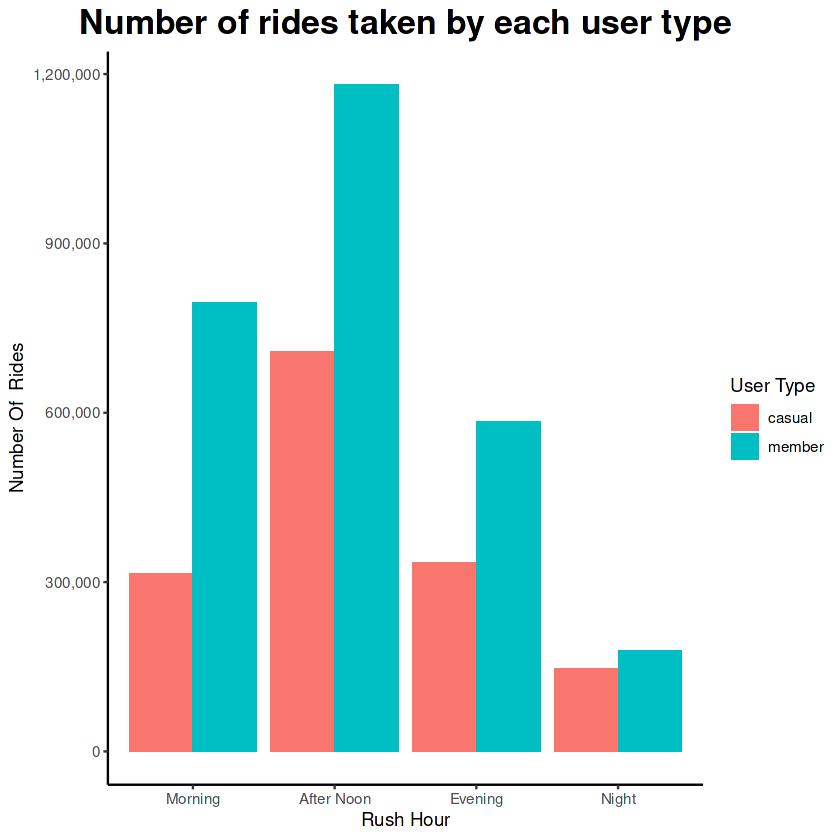

In [28]:
rush_hours_usertype %>% ggplot(mapping = aes(x=rush_hour, y= number_of_rides, fill = user_type)) + 
  geom_col(position="dodge") +
  scale_x_discrete(limits = c("Morning", "After Noon", "Evening", "Night")) +
  scale_y_continuous(labels = comma) +
  ggtitle("Number of rides taken by each user type") +
  xlab("Rush Hour") +
  ylab("Number Of  Rides") +
  labs(fill = "User Type")+
  theme_classic()+
  theme(plot.title = element_text(hjust = 0.5, size=20, face = "bold"))

**INSIGHTS**

The highest number of rides for both user types occurs in the Afternoon.
For members,ride numbers are significantly higher in the morning and Afternoon compared to the evening and night.

STRATEGIES TO ENHANCE SALES:

1- **Targeted Membership Offers**: Given that members take significantly more rides than casual users, especially in the morning and afternoon, the company could create targeted membership promotions during these times to convert casual riders into members.

2- **Peak Time Resource Allocation**: Since the Afternoon sees the highest usage across both user types, the company could ensure optimal availability of bicycles and maintenance during these hours to meet the high demand and improve customer satisfaction.

3- **Incentives for Off-Peak Usage**: To increase rides during the evening and night, especially among casual users who show a substantial drop in these times, the company could offer discounts or special rates for riding during these less busy hours.

4- **Enhanced Safety Features**: The drop in night usage could be due to safety concerns. The company could invest in better lighting for the bikes, enhanced safety features, or even offer safety classes for night riding to encourage more usage during these hours.

5- **Morning Commuter Plans**: The significant number of member rides in the morning suggests that bicycles are being used for commuting to work or school. Offering special commuter plans or benefits could further boost member sales during these hours.